# Import modules

In [1]:
import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/Users/eharkin/Documents/School/Grad work/5HTGIF


In [2]:
import pickle

import matplotlib.pyplot as plt

# Load data

In [3]:
DATA_PATH = os.path.join('data', 'processed', 'gating')

pdata = {}
for fname in os.listdir(DATA_PATH):
    if 'pdata' in fname:
        with open(os.path.join(DATA_PATH, fname), 'rb') as f:
            pdata[fname.split('_')[0]] = pickle.load(f)
            f.close()
    else:
        continue

fittedpts = {}
for fname in os.listdir(DATA_PATH):
    if 'fittedpts' in fname:
        with open(os.path.join(DATA_PATH, fname), 'rb') as f:
            fittedpts[fname.split('_')[0]] = pickle.load(f)
            f.close()
    else:
        continue
        
with open(os.path.join(DATA_PATH, 'gating_params.dat'), 'rb') as f:
    params = pickle.load(f)
    f.close()

# First look at data

In [4]:
plt.rc('lines', linewidth=0.5)

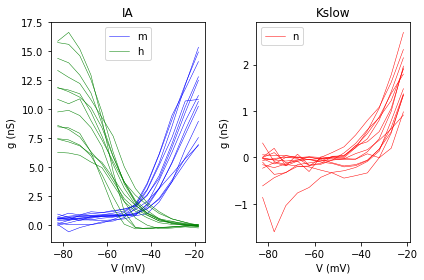

In [5]:
plt.figure()

plt.subplot(121)
plt.title('IA')
plt.plot(pdata['peakact'][1, :, 0], pdata['peakact'][0, :, 0], 'b-', label = 'm')
plt.plot(pdata['peakact'][1, :, 1:], pdata['peakact'][0, :, 1:], 'b-')
plt.plot(pdata['peakinact'][1, :, 0], pdata['peakinact'][0, :, 0], 'g-', label = 'h')
plt.plot(pdata['peakinact'][1, :, 1:], pdata['peakinact'][0, :, 1:], 'g-')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('g (nS)')

plt.subplot(122)
plt.title('Kslow')
plt.plot(pdata['ss'][1, :, 0], pdata['ss'][0, :, 0], 'r-', label = 'n')
plt.plot(pdata['ss'][1, :, 1:], pdata['ss'][0, :, 1:], 'r-')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('g (nS)')

plt.tight_layout()
plt.show()

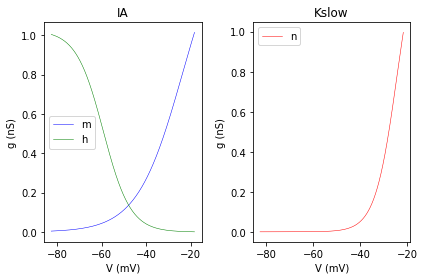

In [6]:
plt.figure()

plt.subplot(121)
plt.title('IA')
plt.plot(fittedpts['peakact'][1, :], fittedpts['peakact'][0, :], 'b-', label = 'm')
plt.plot(fittedpts['peakinact'][1, :], fittedpts['peakinact'][0, :], 'g-', label = 'h')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('g (nS)')

plt.subplot(122)
plt.title('Kslow')
plt.plot(fittedpts['ss'][1, :], fittedpts['ss'][0, :], 'r-', label = 'n')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('g (nS)')

plt.tight_layout()
plt.show()

In [7]:
params

,h,m,n
A,1.025027,1.612950,1.547850
k,-0.164914,0.098484,0.216088
V_half,-59.193314,-23.675046,-24.303697


# Compare data with fit

In [8]:
def max_normalize(cell_channel):
    return cell_channel / cell_channel.max(axis = 0)

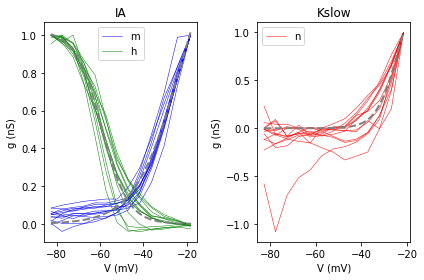

In [9]:
plt.figure()

plt.subplot(121)
plt.title('IA')
plt.plot(pdata['peakact'][1, :, 0], max_normalize(pdata['peakact'][0, :, 0]), 'b-', label = 'm')
plt.plot(pdata['peakact'][1, :, 1:], max_normalize(pdata['peakact'][0, :, 1:]), 'b-')
plt.plot(pdata['peakinact'][1, :, 0], max_normalize(pdata['peakinact'][0, :, 0]), 'g-', label = 'h')
plt.plot(pdata['peakinact'][1, :, 1:], max_normalize(pdata['peakinact'][0, :, 1:]), 'g-')
plt.plot(fittedpts['peakact'][1, :], fittedpts['peakact'][0, :], '--', lw = 2, color = 'gray')
plt.plot(fittedpts['peakinact'][1, :], fittedpts['peakinact'][0, :], '--', lw = 2, color = 'gray')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('g (nS)')

plt.subplot(122)
plt.title('Kslow')
plt.plot(pdata['ss'][1, :, 0], max_normalize(pdata['ss'][0, :, 0]), 'r-', label = 'n')
plt.plot(pdata['ss'][1, :, 1:], max_normalize(pdata['ss'][0, :, 1:]), 'r-')
plt.plot(fittedpts['ss'][1, :], fittedpts['ss'][0, :], '--', lw = 2, color = 'gray')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('g (nS)')

plt.tight_layout()
plt.show()